# 📚 Desvio Padrão Conhecido ou Desconhecido

Ao aplicar qualquer teste para comparar médias, devemos considerar se o desvio padrão populacional (σ) é conhecido ou não. Isso determina o tipo de teste que utilizamos:

# ✅ Desvio padrão populacional conhecido

Situação rara na prática — ocorre geralmente em experimentos controlados ou quando há dados históricos confiáveis da população (seja normal ou n ≥ 30). Neste caso, usamos o teste z para a média (z-test). Distribuição usada: normal padrão (Z).

**🎯 Cenário:**

40 pacientes do Grupo A (tratamento convencional) e 40 pacientes do Grupo B (novo tratamento). Valores simulados de pressão arterial sistólica, com diferença de médias esperada entre os grupos. O desvio padrão populacional é conhecido e igual para os dois grupos sigma_pop = 5

In [1]:
import pandas as pd
import numpy as np

# Simulando duas amostras independentes de pressão arterial entre dois grupos
np.random.seed(42)

# Grupo A (ex: tratamento convencional)
grupo_A = np.random.normal(loc=145, scale=5, size=40)

# Grupo B (ex: novo tratamento), espera-se que a média seja menor
grupo_B = np.random.normal(loc=140, scale=5, size=40)

# Criar DataFrame com identificação de grupo
df_independente = pd.DataFrame({
    "Paciente": range(1, 81),
    "Grupo": ["A"] * 40 + ["B"] * 40,
    "Pressao_Arterial": np.concatenate([grupo_A, grupo_B])
})


In [3]:
df_independente

,Paciente,Grupo,Pressao_Arterial
0,1,A,147.483571
1,2,A,144.308678
2,3,A,148.238443
3,4,A,152.615149
4,5,A,143.829233
...,...,...,...
75,76,B,144.109513
76,77,B,140.435235
77,78,B,138.504963
78,79,B,140.458804


#### 🧪 Especifique as Hipóteses

* H0: média A = média B  →  diferença = 0
* H1: média A > média B  →  Grupo A tem maior pressão arterial

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [4]:
alpha = 0.05

####🧮 Passo 3 – Escolha o Teste Adequado

Como temos:
* 2 amostra
* A variável é quantitativa contínua (pressão arterial)
* A amostra é aleatória e de tamanho razoável (n = 36 ≥ 30)
* O desvio padrão populacional é conhecido (σ = 4)

➡️ Usaremos o Teste Z para duas médias

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [6]:
grupo_A_vals = df_independente[df_independente["Grupo"] == "A"]["Pressao_Arterial"].values
grupo_A_vals

array([147.48357077, 144.30867849, 148.23844269, 152.61514928,
       143.82923313, 143.82931522, 152.89606408, 148.83717365,
       142.65262807, 147.71280022, 142.68291154, 142.67135123,
       146.20981136, 135.43359878, 136.37541084, 142.18856235,
       139.9358444 , 146.57123666, 140.45987962, 137.93848149,
       152.32824384, 143.8711185 , 145.33764102, 137.87625907,
       142.27808638, 145.55461295, 139.24503211, 146.87849009,
       141.99680655, 143.54153125, 141.99146694, 154.26139092,
       144.93251388, 139.71144536, 149.11272456, 138.89578175,
       146.04431798, 135.20164938, 138.35906976, 145.98430618])

In [10]:
n1 = len(grupo_A_vals)
media1 = np.mean(grupo_A_vals)

n1, media1

(40, np.float64(143.90681580791028))

In [7]:
grupo_B_vals = df_independente[df_independente["Grupo"] == "B"]["Pressao_Arterial"].values
grupo_B_vals

array([143.6923329 , 140.85684141, 139.42175859, 138.49448152,
       132.60739005, 136.40077896, 137.69680615, 145.28561113,
       141.71809145, 131.18479922, 141.62041985, 138.0745886 ,
       136.61539   , 143.05838144, 145.15499761, 144.6564006 ,
       135.80391238, 138.45393812, 141.65631716, 144.87772564,
       137.60412881, 139.07170512, 134.46832513, 134.01896688,
       144.06262911, 146.78120014, 139.63994939, 145.01766449,
       141.80818013, 136.77440123, 141.80697803, 147.69018283,
       139.8208698 , 147.82321828, 126.90127448, 144.10951252,
       140.43523534, 138.50496325, 140.45880388, 130.06215543])

In [11]:
n2 = len(grupo_B_vals)
media2 = np.mean(grupo_B_vals)

n2, media2

(40, np.float64(139.85478267578532))

In [12]:
# Supondo que o desvio padrão populacional é conhecido e igual para os dois grupos
sigma_pop = 5

In [14]:
from scipy.stats import norm

In [15]:
z = (media1 - media2) / (sigma_pop * np.sqrt(1/n1 + 1/n2))
p_valor = 1 - norm.cdf(z)  # teste unilateral à direita (Grupo A > Grupo B)

z, p_valor

(np.float64(3.62424861220512), np.float64(0.00014490137045786167))

In [17]:
import matplotlib.pyplot as plt

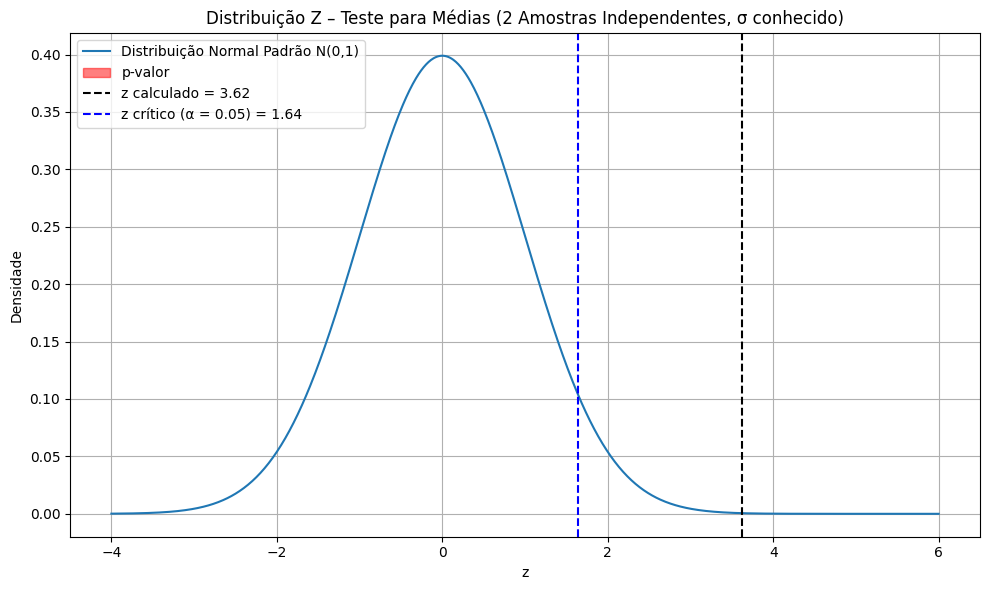

In [18]:
# Gráfico
x = np.linspace(-4, 6, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label="Distribuição Normal Padrão N(0,1)")
ax.fill_between(x, 0, y, where=(x >= z), color="red", alpha=0.5, label="p-valor")
ax.axvline(z, color="black", linestyle="--", label=f"z calculado = {z:.2f}")
ax.axvline(norm.ppf(1 - alpha), color="blue", linestyle="--", label=f"z crítico (α = {alpha}) = {norm.ppf(1 - alpha):.2f}")
ax.set_title("Distribuição Z – Teste para Médias (2 Amostras Independentes, σ conhecido)")
ax.set_xlabel("z")
ax.set_ylabel("Densidade")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

####📈 Passo 5 – Interprete os Resultados

Como z > z crítico e p < 0,05, rejeitamos H₀

Há evidência estatística significativa de que a pressão arterial do Grupo A é maior que a do Grupo B



#🚫 Desvio padrão populacional desconhecido

#### 🧪 Especifique as Hipóteses

* H₀ (hipótese nula): As médias dos grupos A e B são iguais (μ₁ = μ₂)
* H₁ (hipótese alternativa): A média do Grupo A é maior que a do Grupo B (μ₁ > μ₂)

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [19]:
alpha = 0.05

####🧮 Passo 3 – Escolha o Teste Adequado

* Duas amostras independentes, σ desconhecido → Teste t para duas médias independentes

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [21]:
from scipy.stats import ttest_ind, t

In [25]:
# equal_var=True assume que as variâncias dos dois grupos são iguais
t_stat, p_valor = ttest_ind(grupo_A_vals, grupo_B_vals, equal_var=True, alternative='greater')
print(t_stat, p_valor)

3.7799565795207064 0.00015266418980466526


In [23]:
# Graus de liberdade
n1 = len(grupo_A_vals)
n2 = len(grupo_B_vals)
gl = n1 + n2 - 2

In [26]:
# Valor crítico para teste unilateral à direita
t_critico = t.ppf(1 - alpha, df=gl)
t_critico

np.float64(1.6646246445715054)

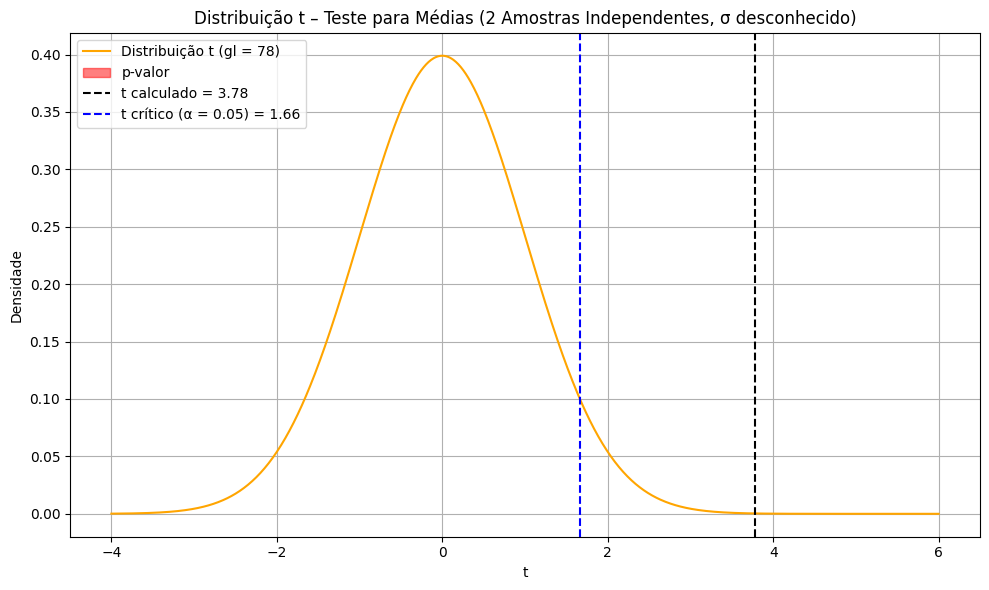

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label=f"Distribuição t (gl = {gl})", color="orange")
ax.fill_between(x, 0, y, where=(x >= t_stat), color="red", alpha=0.5, label="p-valor")
ax.axvline(t_stat, color="black", linestyle="--", label=f"t calculado = {t_stat:.2f}")
ax.axvline(t_critico, color="blue", linestyle="--", label=f"t crítico (α = {alpha}) = {t_critico:.2f}")
ax.set_title("Distribuição t – Teste para Médias (2 Amostras Independentes, σ desconhecido)")
ax.set_xlabel("t")
ax.set_ylabel("Densidade")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

####📈 Passo 5 – Interprete os Resultados

Como t > t crítico e p < 0,05, rejeitamos H₀

Há evidência estatística significativa de que a média da pressão arterial no Grupo A é maior que no Grupo B